## Introduction
This dataset was given to try different classification algorithms and models to explore which gives best accuracy

The target is to predict whether a student is going to graduate or not

The dataset contains outliers but no null or nan values and all values are numerical except target variable

## Loading the Data

In [1]:
# Imprting needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from imblearn.combine import SMOTEENN
from collections import Counter
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
import seaborn as sns
from imblearn.over_sampling import SMOTE
from collections import Counter


In [2]:
# Loading the dataset
df = pd.read_csv('dataset.csv', sep=';')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Exploratory Data Analysis (EDA)

In [3]:
# Dataset summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nationality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [4]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [5]:
df.shape

(4424, 35)

In [6]:
categorical = [col for col in df.columns if df[col].dtype=='O']
print('Columns that contain categerical data: ',categorical)

Columns that contain categerical data:  ['Target']


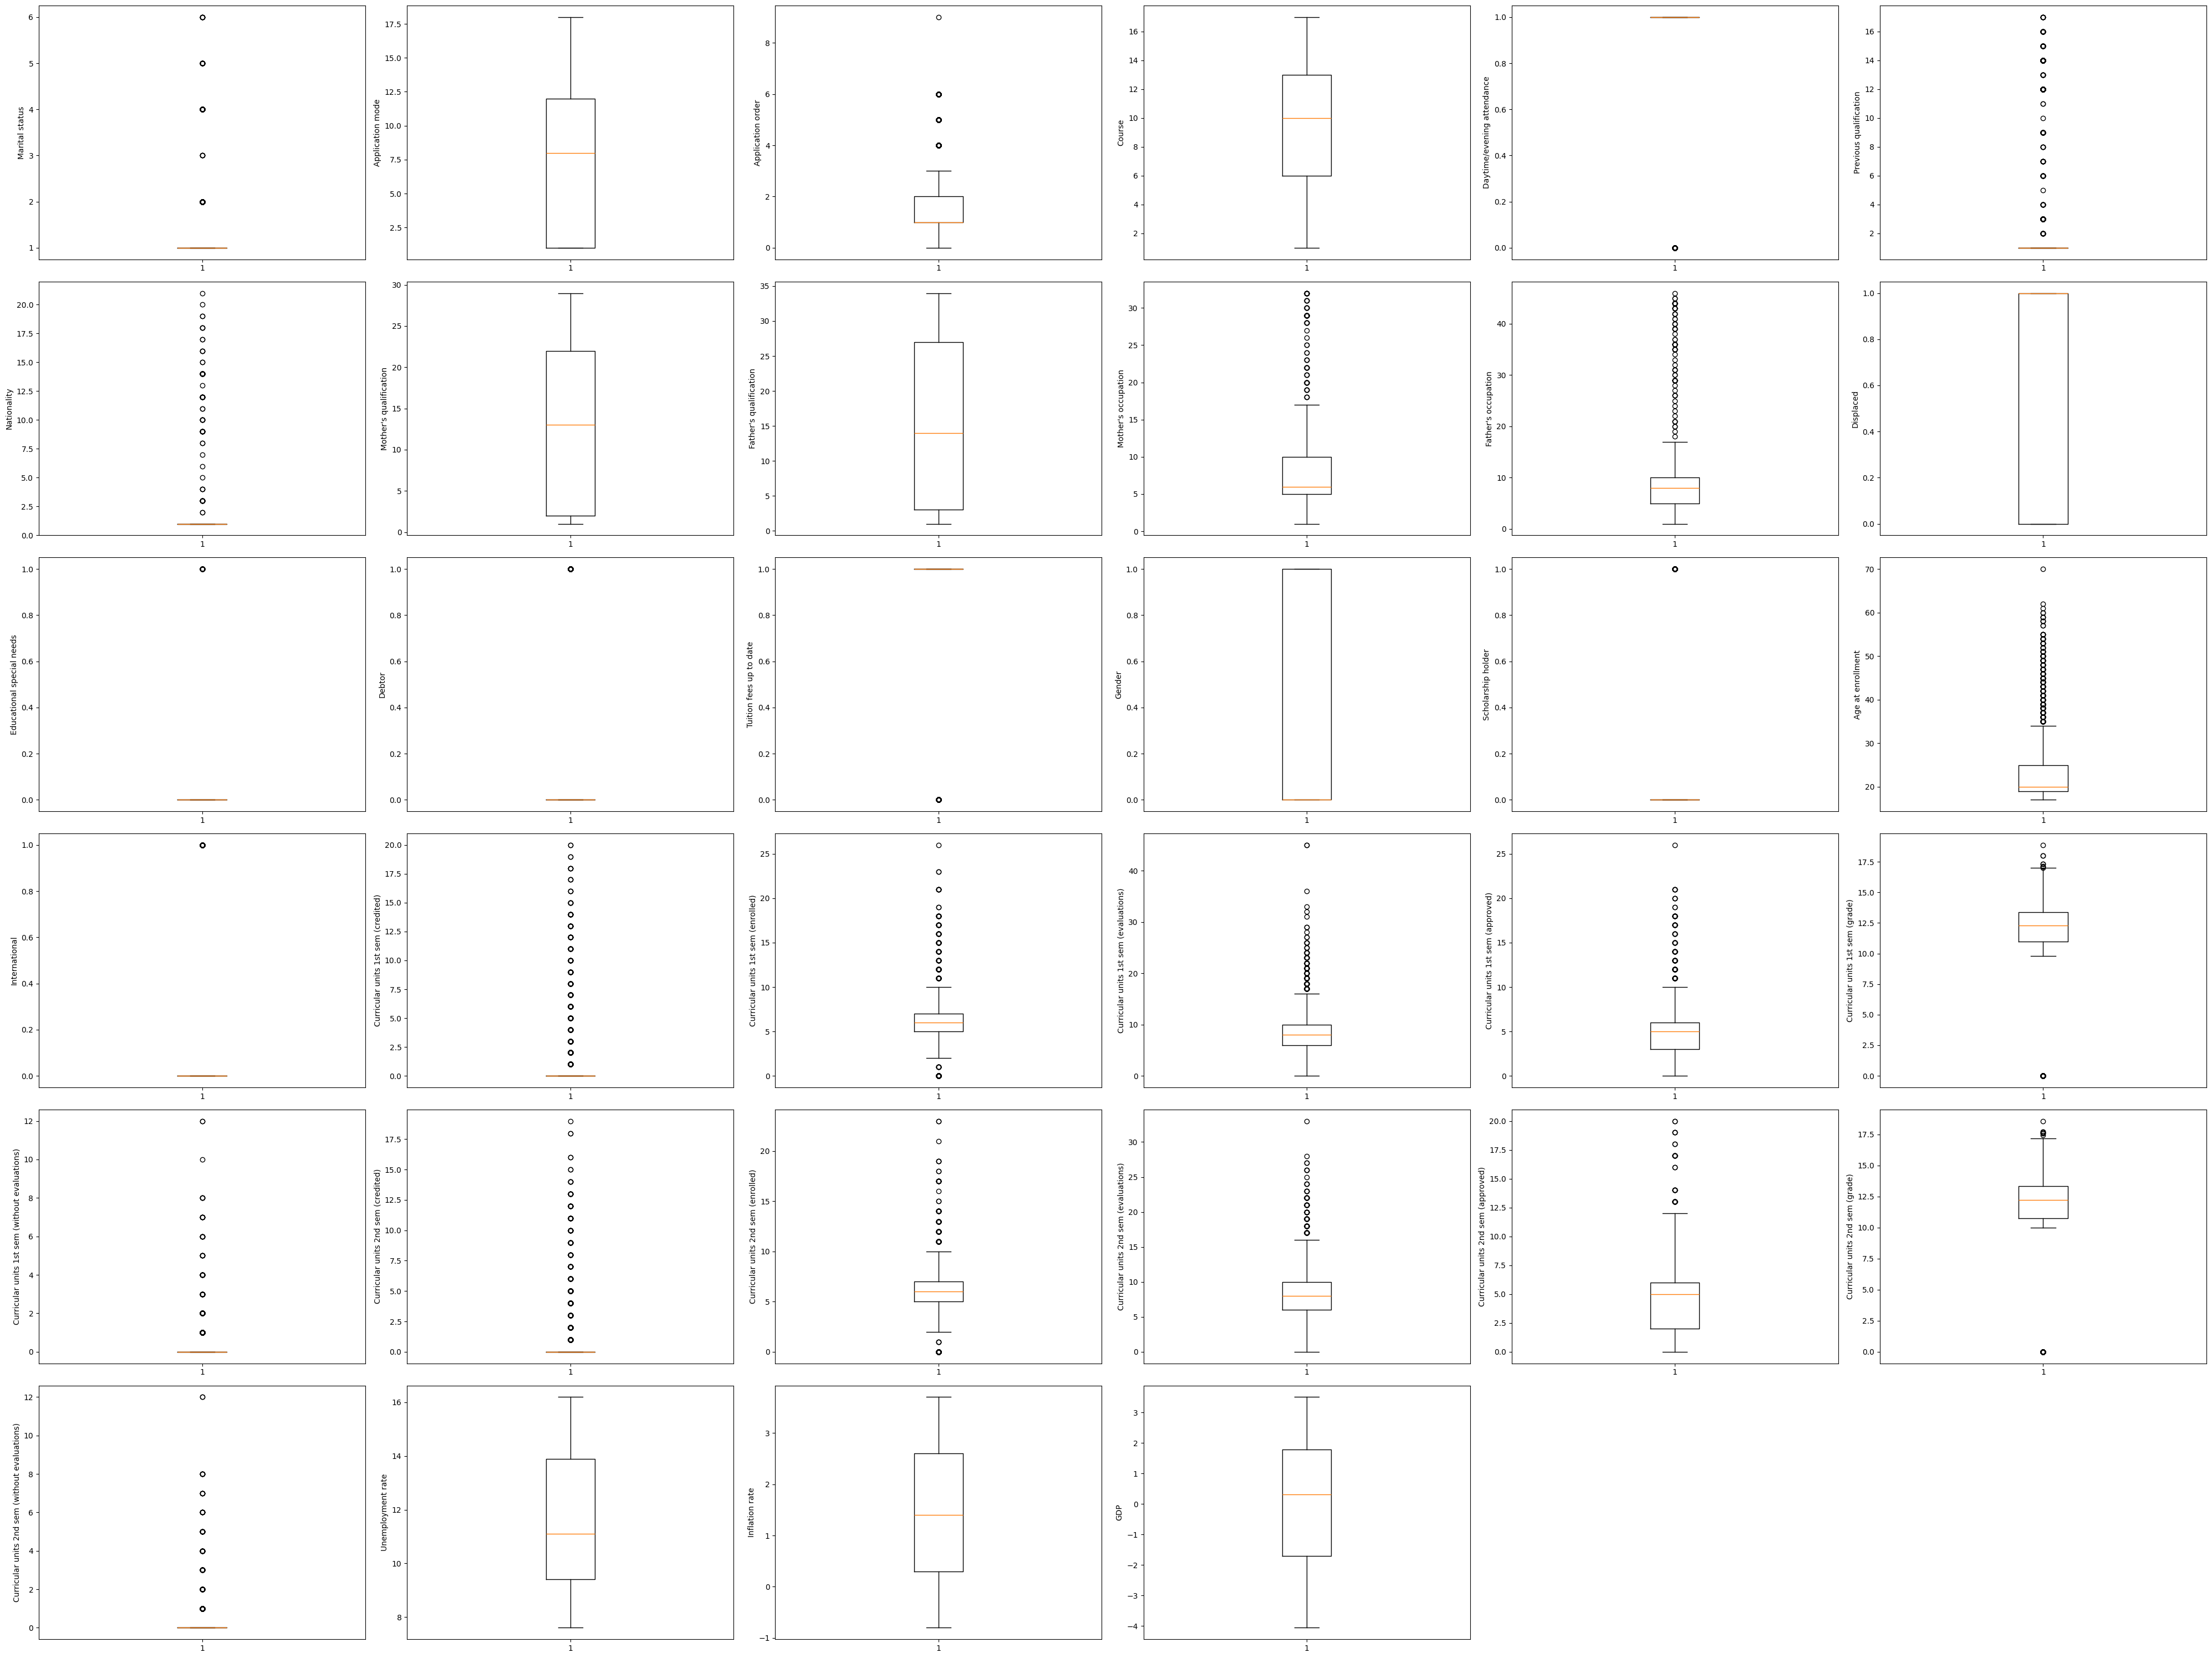

In [7]:
# Check Feature distribution & outliers
plt.figure(figsize=(40, 30))

df_copy = df.drop('Target', axis=1)
num_columns = len(df_copy.columns)
rows = num_columns // 6 + (num_columns % 6 > 0)

i = 1
for col in df_copy.columns:
    plt.subplot(rows, 6, i)
    plt.boxplot(df_copy[col]) 
    plt.ylabel(str(col)) 
    i += 1  

plt.tight_layout()
plt.show()


In [8]:
## Target class distribution
target_distribution = df['Target'].value_counts()

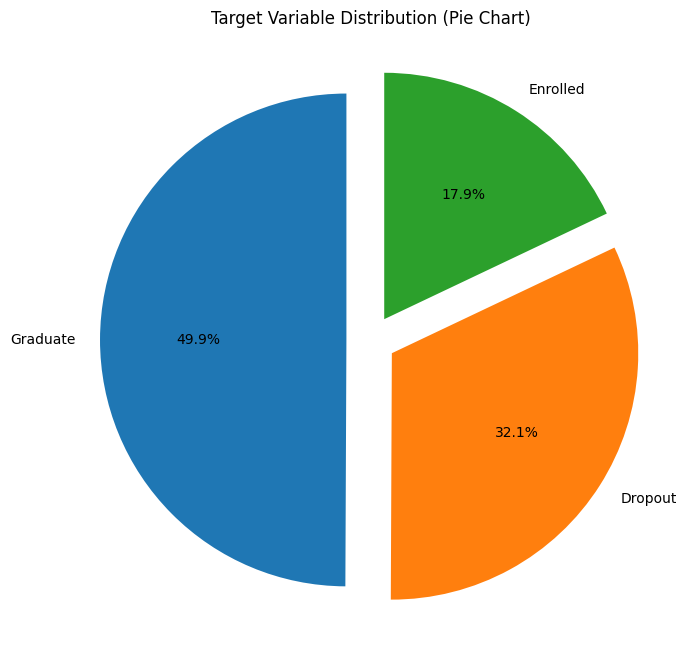

In [9]:
explode = [0.1] * len(target_distribution)   # this defines a margin for each target class
plt.figure(figsize=(8, 8))
target_distribution.plot.pie(autopct='%1.1f%%', startangle=90, explode=explode)
plt.title('Target Variable Distribution (Pie Chart)')
plt.ylabel('')
plt.show()

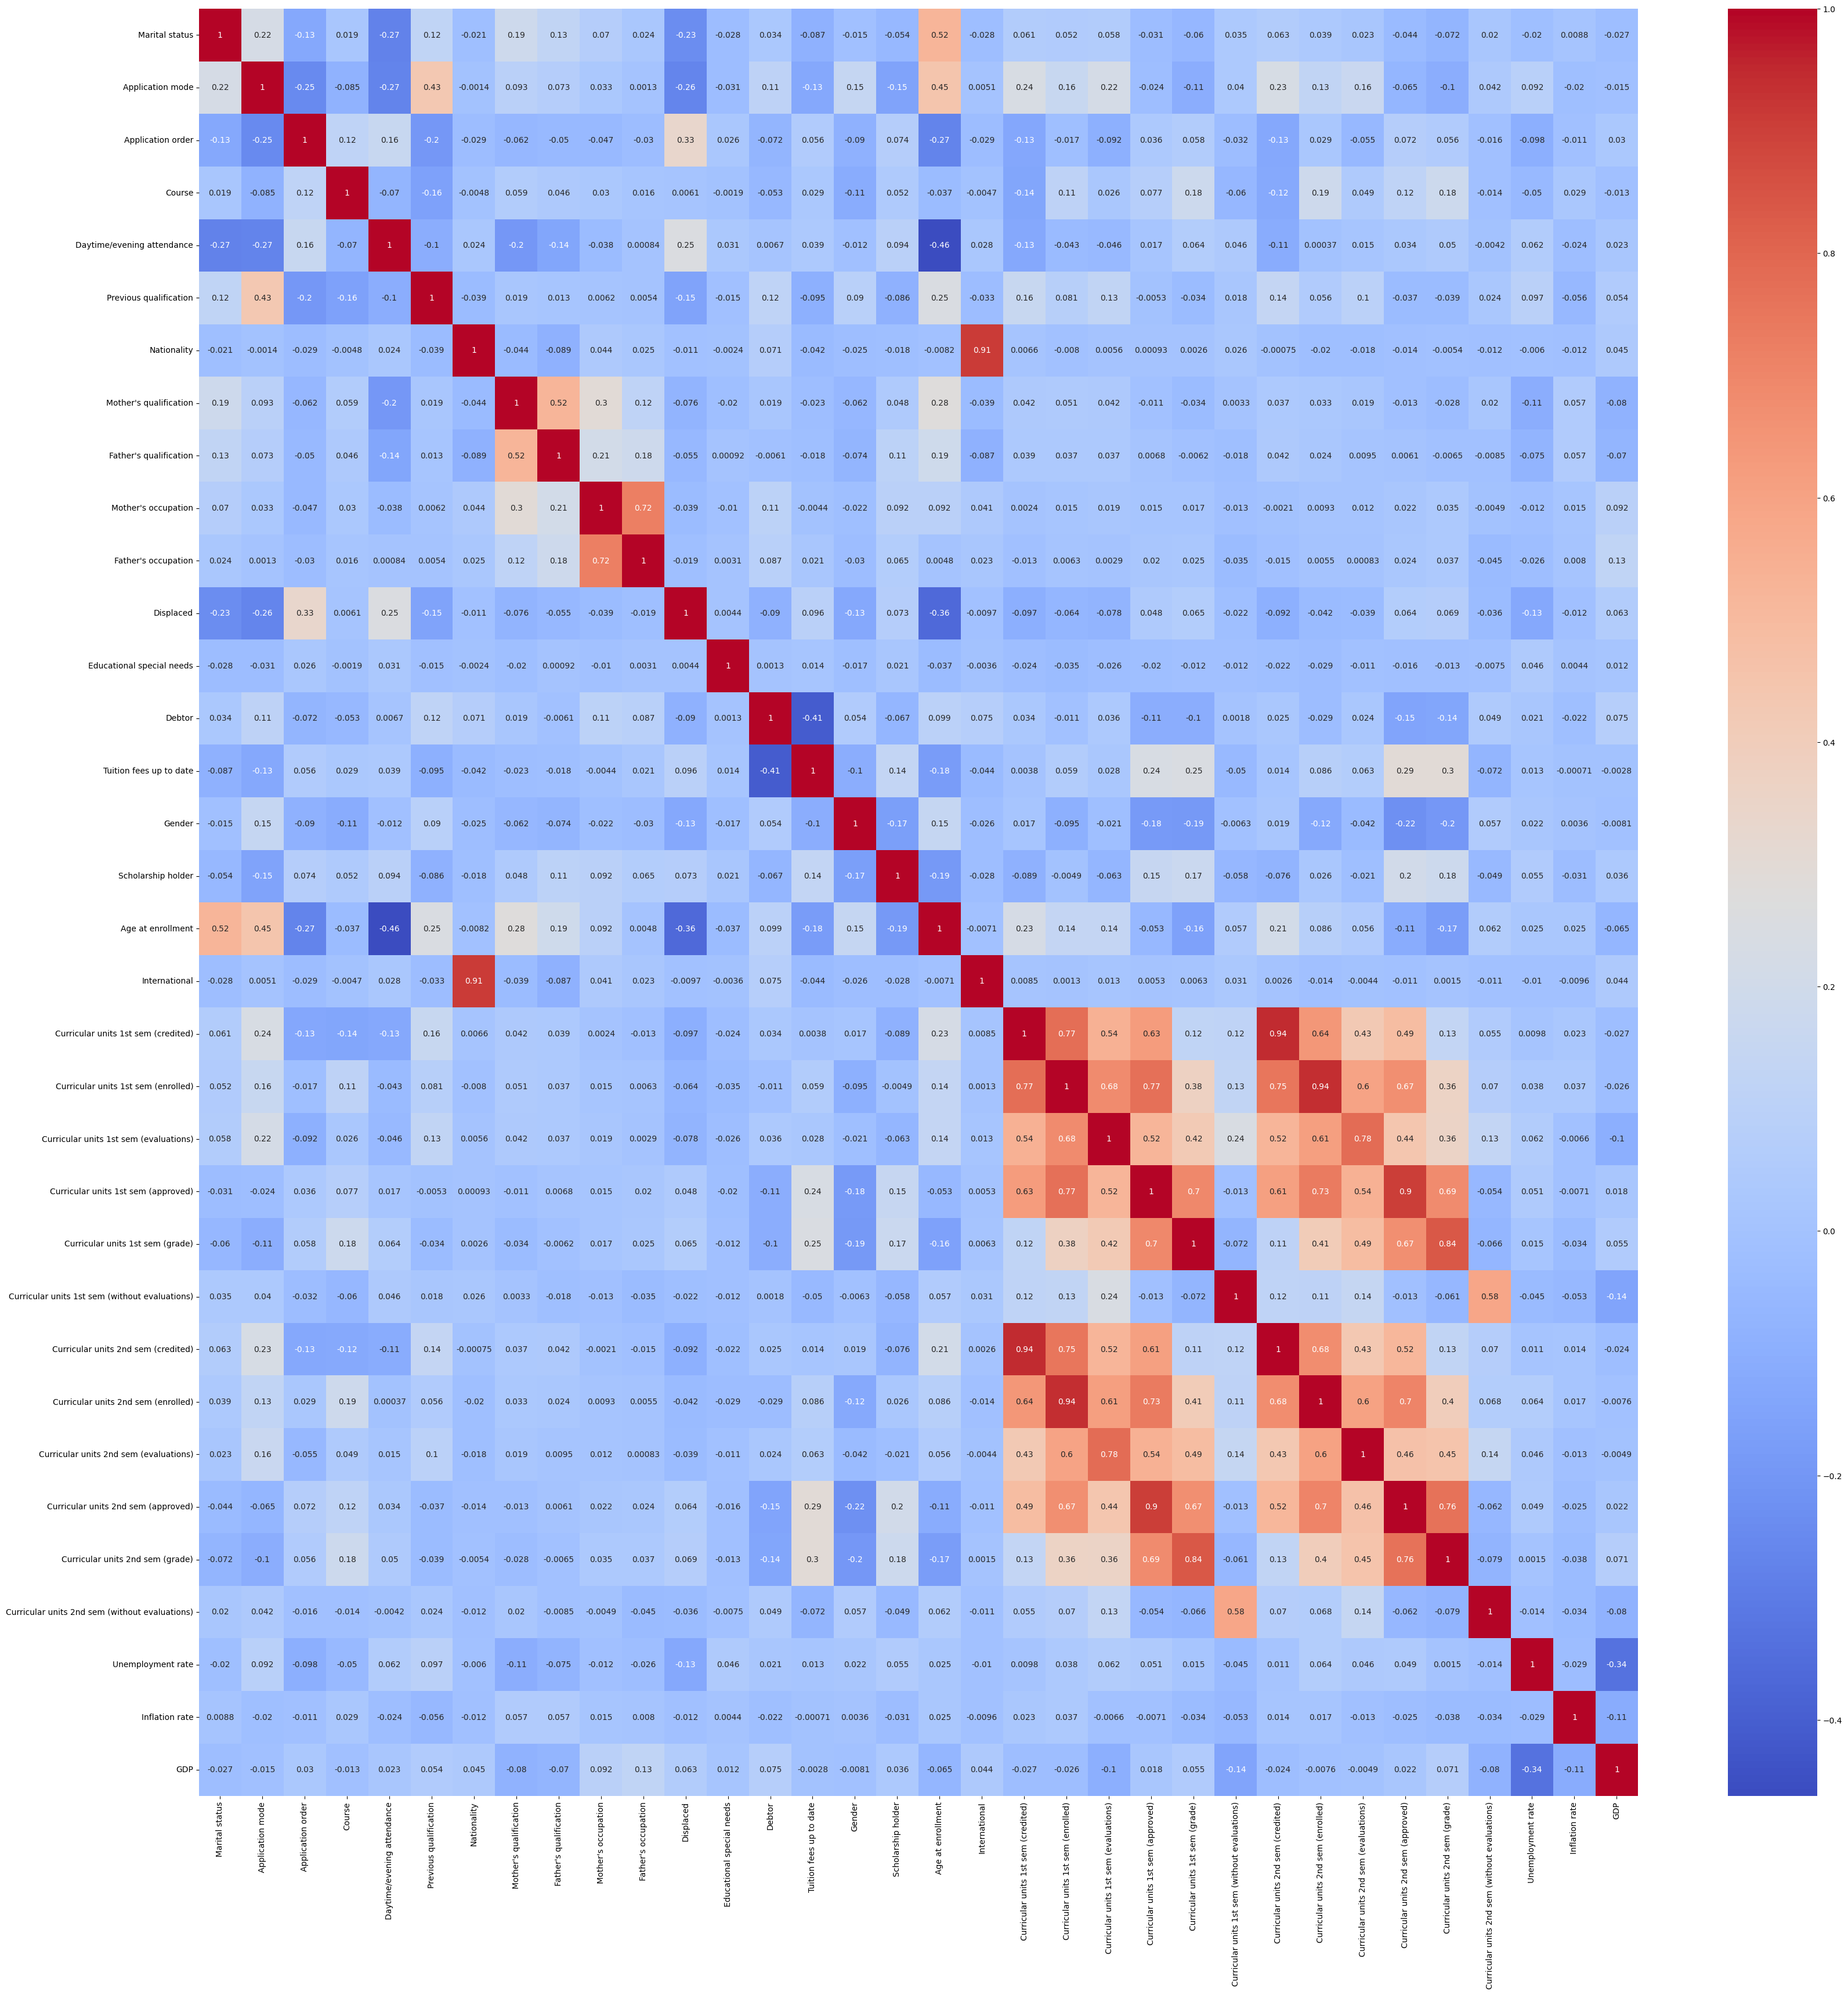

In [10]:
corr_matrix = df_copy.corr()
plt.figure(figsize=(40,40))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.show()

In [11]:
df.isna().sum().any()

False

In [12]:
df.isna().any().any()

False

In [13]:
df.duplicated().sum().any()

#df = df[df.duplicated(keep=False)]

False

## Data cleaning

No null, NaN or duplicate values exist


In [3]:
## 1_Typo Error
df.rename(columns={'Nacionality': 'Nationality'}, inplace=True)
df.to_csv('dataset.csv', sep=';', index=False)

## Outlier Removal

In [18]:
## 2_Removing outliers with interquartile range method
df_copy = df
for col in df.select_dtypes(include=['number']).columns:
    
    IQR = df_copy[col].quantile(0.90) - df_copy[col].quantile(0.10)
    Lower_fence = df_copy[col].quantile(0.10) - (IQR * 3) 
    Upper_fence = df_copy[col].quantile(0.90) + (IQR * 3) 
    
    df_copy = df_copy[(df_copy[col] >= Lower_fence) & (df_copy[col] <= Upper_fence)]

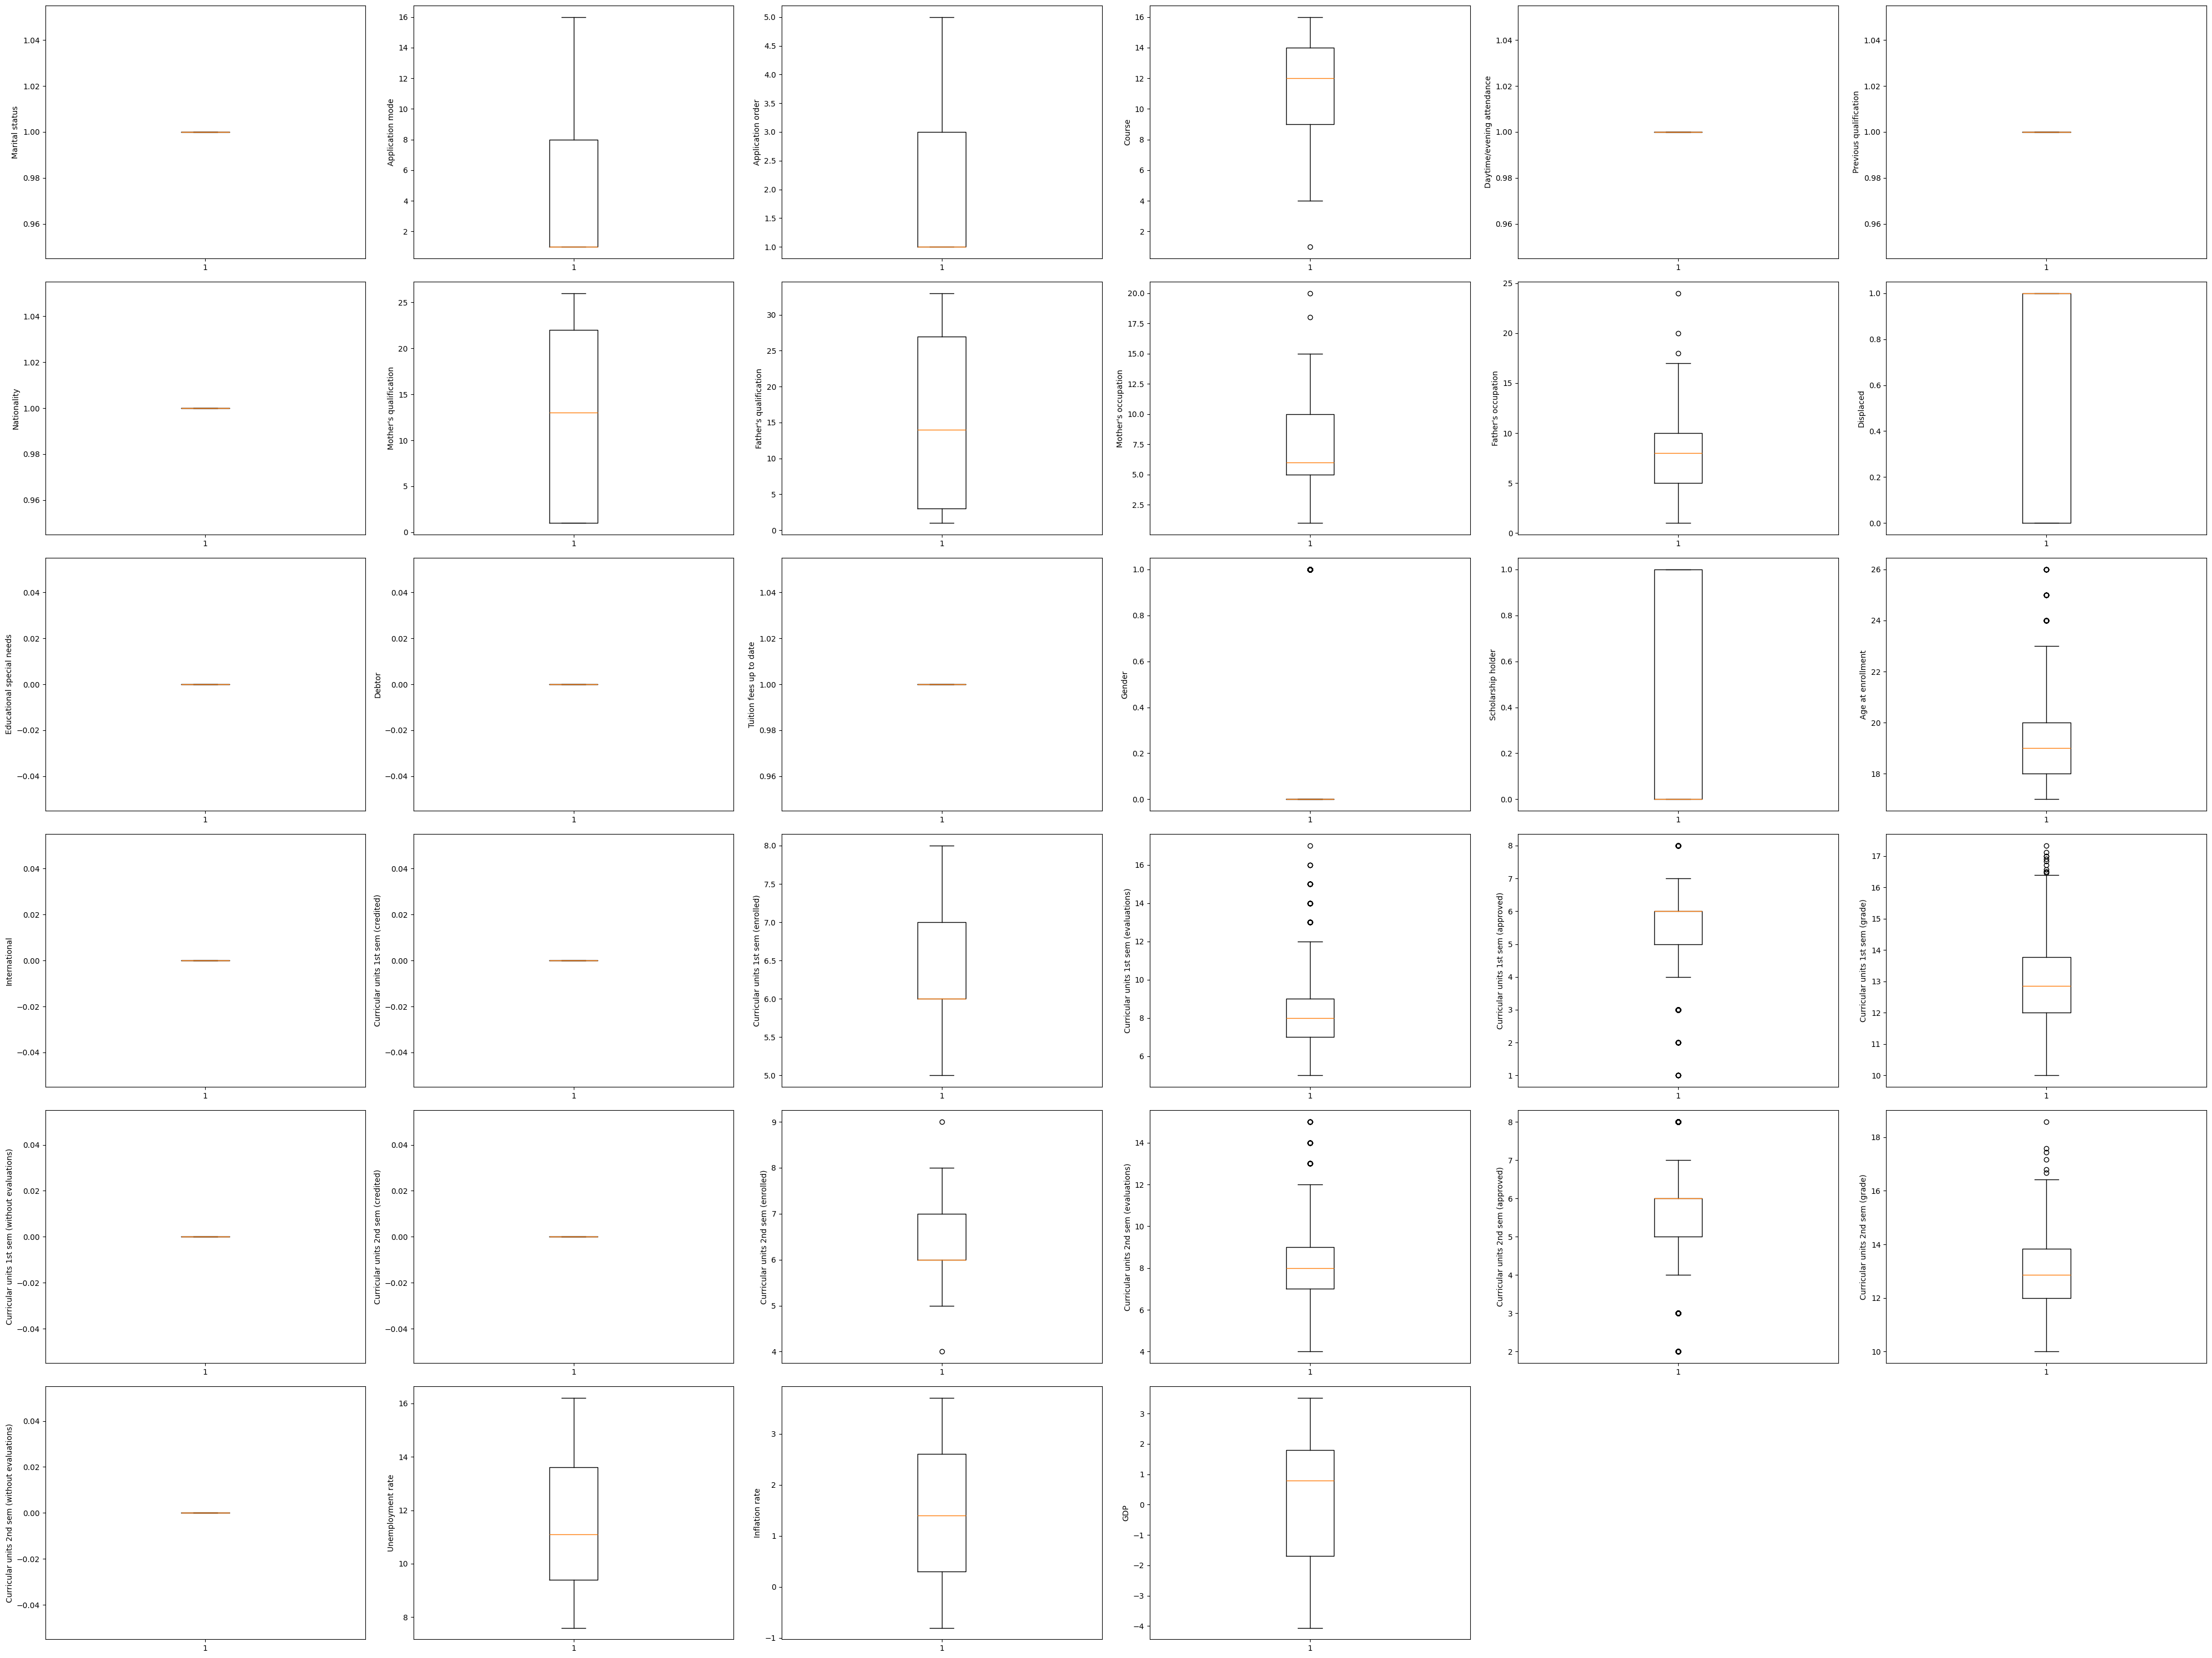

In [5]:
# Check Feature distribution & outliers
plt.figure(figsize=(40, 30))

num_columns = len(df_copy.columns)
rows = num_columns // 6 + (num_columns % 6 > 0)

i = 1
for col in df_copy.columns:
    if col == 'Target':
        break
    plt.subplot(rows, 6, i)
    plt.boxplot(df_copy[col]) 
    plt.ylabel(str(col)) 
    i += 1  

plt.tight_layout()
plt.show()


## Splitting data for feature extraction

In [6]:
target_column = 'Target' 

X = df_copy.drop('Target', axis=1)
y = df_copy[target_column]


label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y_encoded = pd.DataFrame(y, columns = ['Target'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(df_copy['Target'].value_counts())
print(y_encoded.value_counts())


Target
Graduate    1250
Enrolled     312
Dropout      164
Name: count, dtype: int64
Target
2         1250
1          312
0          164
Name: count, dtype: int64


Graduate --> 2

Dropout --> 0

Enrolled --> 1

## Feature Selection With RFE

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = LogisticRegression()

rfe = RFE(estimator=model)


rfe.fit(X_train_scaled, y_train)


selected_features = X.columns[rfe.support_]


In [8]:
print('original features num: ',len(df.columns))
print('selected features num: ',selected_features.shape[0])

original features num:  35
selected features num:  17


In [9]:
df_rfe = df_copy[selected_features]

In [10]:
df_rfe.columns

Index(['Application mode', 'Course', 'Mother's qualification',
       'Father's qualification', 'Father's occupation', 'Displaced', 'Gender',
       'Scholarship holder', 'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)', 'Unemployment rate', 'GDP'],
      dtype='object')

In [11]:
df_rfe.shape[0] == y.shape[0]

True

## Scaling the dataset

In [19]:
scaler = StandardScaler()
df_rfe = scaler.fit_transform(df_rfe)
df_rfe = pd.DataFrame(df_rfe, columns=selected_features)


In [20]:
df_rfe.describe()

,Application mode,Course,Mother's qualification,Father's qualification,Father's occupation,Displaced,Gender,Scholarship holder,Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Unemployment rate,GDP
count,1.726000e+03,1.726000e+03,1.726000e+03,1.726000e+03,1.726000e+03,1.726000e+03,1.726000e+03,1.726000e+03,1.726000e+03,1.726000e+03,1.726000e+03,1726.000000,1.726000e+03,1.726000e+03,1.726000e+03,1.726000e+03,1.726000e+03
mean,-5.145877e-18,-3.705032e-17,-1.646681e-17,4.528372e-17,-3.602114e-17,-1.646681e-17,-4.940042e-17,3.087526e-17,-1.852516e-17,4.116702e-18,-4.116702e-18,0.000000,2.058351e-17,1.235011e-17,-1.749598e-17,1.646681e-17,-1.235011e-17
std,1.000290e+00,1.000290e+00,1.000290e+00,1.000290e+00,1.000290e+00,1.000290e+00,1.000290e+00,1.000290e+00,1.000290e+00,1.000290e+00,1.000290e+00,1.000290,1.000290e+00,1.000290e+00,1.000290e+00,1.000290e+00,1.000290e+00
min,-7.888047e-01,-3.362339e+00,-1.168693e+00,-1.341746e+00,-2.480046e+00,-1.492035e+00,-5.679836e-01,-7.849235e-01,-1.464969e+00,-1.535660e+00,-3.728434e+00,-2.272676,-2.328724e+00,-2.451198e+00,-2.194850e+00,-1.554734e+00,-1.874871e+00
25%,-7.888047e-01,-7.262285e-01,-1.168693e+00,-1.160210e+00,-9.430407e-01,-1.492035e+00,-5.679836e-01,-7.849235e-01,-2.921784e-01,-5.073190e-01,-4.978731e-01,-0.717229,-3.789895e-01,-4.330230e-01,-7.041877e-01,-8.539059e-01,-8.119115e-01
50%,-7.888047e-01,2.623128e-01,1.805807e-01,-1.617625e-01,2.097130e-01,6.702256e-01,-5.679836e-01,-7.849235e-01,-2.921784e-01,6.851636e-03,3.097669e-01,-0.050610,-3.789895e-01,2.397022e-01,-6.533233e-02,-1.920126e-01,3.096011e-01
75%,9.127376e-01,9.213403e-01,1.192536e+00,1.018221e+00,9.782155e-01,6.702256e-01,-5.679836e-01,1.274010e+00,8.806120e-01,5.210223e-01,3.097669e-01,0.666840,5.958778e-01,2.397022e-01,6.622530e-01,7.813597e-01,7.600077e-01
max,2.857357e+00,1.580368e+00,1.642294e+00,1.562828e+00,6.357733e+00,6.702256e-01,1.760614e+00,1.274010e+00,2.053402e+00,4.634387e+00,1.925047e+00,3.430627,2.545612e+00,1.585153e+00,4.193703e+00,1.793667e+00,1.534707e+00


## Splitting the dataset for training

In [21]:
X_train, X_test, y_train, y_test = train_test_split(df_rfe, y, test_size=0.2, random_state=42)

## Balancing the dataset

In [22]:
print("Class distribution before SMOTE:", Counter(y_train))

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print("Class distribution after SMOTE:", Counter(y_train_balanced))

Class distribution before SMOTE: Counter({2: 1002, 1: 247, 0: 131})
Class distribution after SMOTE: Counter({2: 1002, 0: 1002, 1: 1002})


Graduate --> 2

Dropout --> 0

Enrolled --> 1

## Model -- Logistic regression

In [16]:
X_train_balanced.shape[0] == y_train_balanced.shape[0]

True

In [17]:
model = LogisticRegression(multi_class='ovr')
model.fit(X_train_balanced, y_train_balanced)
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.24      0.45      0.31        33
           1       0.44      0.48      0.46        65
           2       0.89      0.76      0.82       248

    accuracy                           0.68       346
   macro avg       0.52      0.56      0.53       346
weighted avg       0.74      0.68      0.70       346



 0.77 

## Model -- SVM

In [23]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [26]:
svc = SVC(kernel='linear', random_state=42)
svc.fit(X_train_balanced, y_train_balanced)

train_predictions = svc.predict(X_train_balanced)
test_predictions = svc.predict(X_test)

train_accuracy = accuracy_score(y_train_balanced, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

train_f1_macro = f1_score(y_train_balanced, train_predictions, average='macro')
test_f1_macro = f1_score(y_test, test_predictions, average='macro')

train_conf_matrix = confusion_matrix(y_train_balanced, train_predictions)
test_conf_matrix = confusion_matrix(y_test, test_predictions)

results = {
    "Train Accuracy": train_accuracy,
    "Test Accuracy": test_accuracy,
    "Train F1 Macro": train_f1_macro,
    "Test F1 Macro": test_f1_macro,
    "Train Confusion Matrix": train_conf_matrix,
    "Test Confusion Matrix": test_conf_matrix
}

results

{'Train Accuracy': 0.6067864271457086,
 'Test Accuracy': 0.6647398843930635,
 'Train F1 Macro': 0.6020160912311862,
 'Test F1 Macro': 0.5101596395128732,
 'Train Confusion Matrix': array([[522, 237, 243],
        [312, 525, 165],
        [118, 107, 777]], dtype=int64),
 'Test Confusion Matrix': array([[ 14,  11,   8],
        [ 20,  29,  16],
        [ 32,  29, 187]], dtype=int64)}

## Model -- KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [28]:
K = 20
error =[]
accuracy=[]
for i in range(1,K+1):
    knn= KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train_balanced, y_train_balanced)
    y_pred =knn.predict(X_test)
    error.append(1-metrics.accuracy_score(y_test,y_pred))
    accuracy.append(metrics.accuracy_score(y_test,y_pred))


Text(0.5, 1.0, 'accuracy vs K')

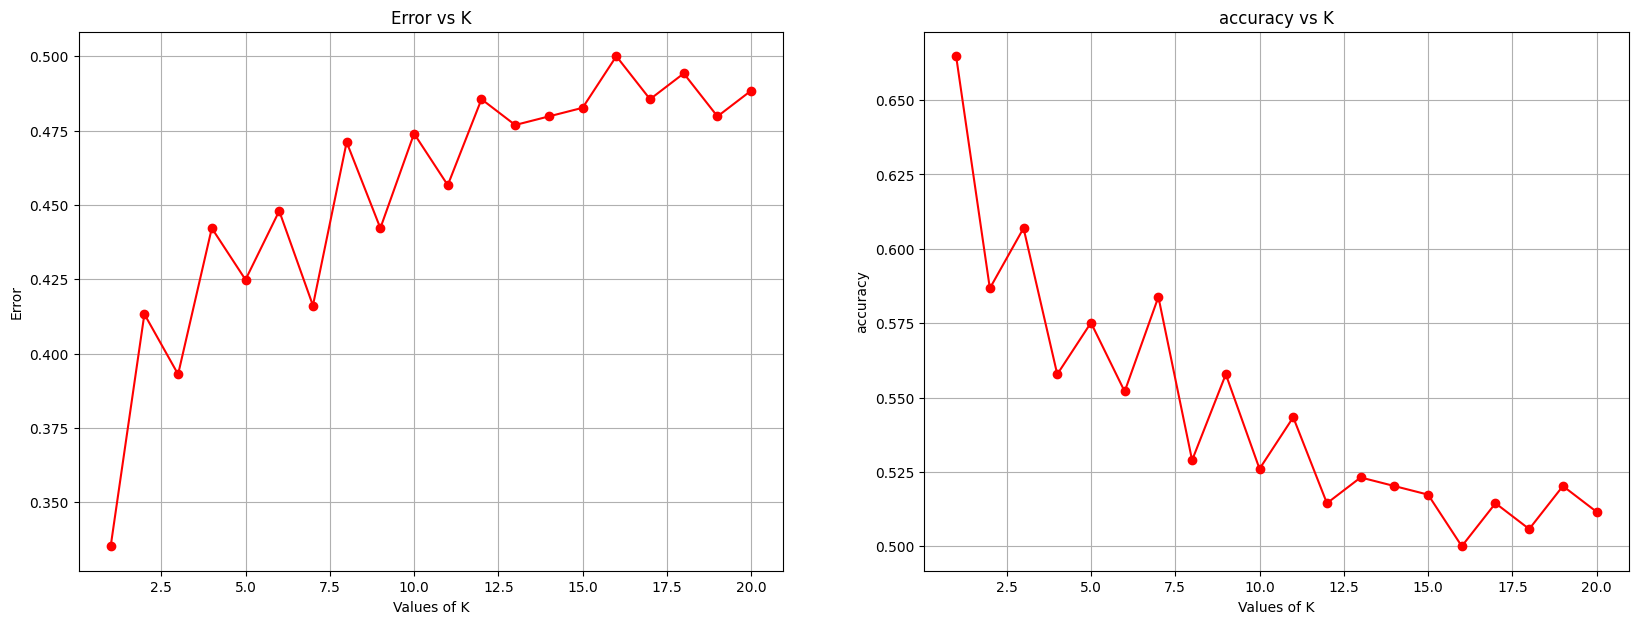

In [29]:

plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
plt.plot(range(1,21),error,'r-',marker='o')
plt.xlabel('Values of K')
plt.ylabel('Error')
plt.grid()
plt.title('Error vs K')

plt.subplot(1, 2, 2)
plt.plot(range(1,21),accuracy,'r-',marker='o')
plt.xlabel('Values of K')
plt.ylabel('accuracy')
plt.grid()
plt.title('accuracy vs K')

In [32]:
K=13
clf= KNeighborsClassifier(K)
clf.fit(X_train,y_train)
y_pred =clf.predict(X_test)
print("Accuracy :" ,metrics.accuracy_score(y_test,y_pred))

Accuracy : 0.7601156069364162


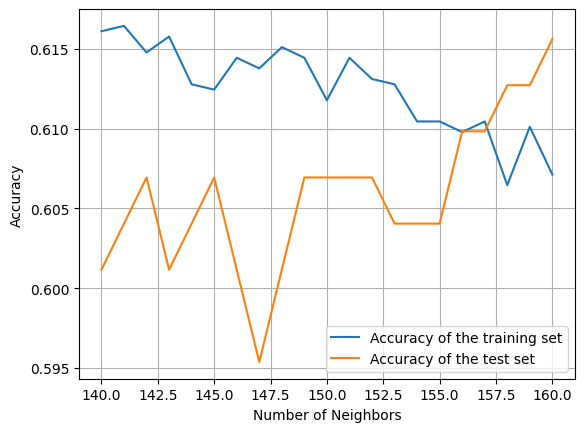

In [37]:
training_acc = []
test_acc = []

neighbors_setting = range(140,161)
for n_neighbors in neighbors_setting:
    knn= KNeighborsClassifier(n_neighbors= n_neighbors, )
    knn.fit(X_train_balanced,y_train_balanced)
    training_acc.append(knn.score(X_train_balanced,y_train_balanced))
    test_acc.append(knn.score(X_test,y_test))

plt.plot(neighbors_setting,training_acc,label='Accuracy of the training set')
plt.plot(neighbors_setting,test_acc,label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.grid()
plt.legend()
plt.show()

No Way